### Prep

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("data.csv")
print("Shape:", df.shape)
print("no. customers:", df.Customer_number.nunique())


print(df.dtypes)
#convert FactDt to date
df['FactDt'] = pd.to_datetime(df['FactDt'])
df['CustEstbDt'] = pd.to_datetime(df['CustEstbDt'])
# All customers are active so drop:
df.drop(columns=['CustomerActive'], inplace=True)


Shape: (120000, 38)
no. customers: 10451
FactDt                          object
Customer_number                 object
Business_Volume                float64
Gross_wealth                   float64
Net_Wealth                     float64
All_Loans                      float64
House_free_Equity              float64
Financial_Assets               float64
Investment_Assets              float64
RealEstateValue                float64
HomeLoan                       float64
CAR_LOANS                      float64
BOAT_LOANS                     float64
Other_loans                    float64
CustAgeInYears                 float64
CustGenderCd                    object
CustEstbDt                      object
CustomerActive                  object
fam_members_adult                int64
fam_members                      int64
Country                         object
CustPostalCd                    object
CustMobileLogOnPerMth            int64
CustNetBankLogOnPerMth           int64
IsGeneralMarketingAllow

In [4]:
#display all columns pandas
pd.set_option('display.max_columns', None)

#display not in scientific form, and at max 2 decimals, use "," as the decimal and "." as thousand seperator
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x).replace(',', 'X').replace('.', ',').replace('X', '.'))


In [5]:
#inital look at statistics
display(df.describe())

,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,fam_members_adult,fam_members,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest
count,"120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","119.562,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00","120.000,00"
mean,"549.018,45","878.966,80","644.392,98","-234.573,82","331.634,22","194.363,02","198.982,19","561.766,52","-231.818,14","-1.677,83","-8,00","-2.755,68","45,57","1,44","1,85","13,44","1,56","0,99","0,35","0,31","0,00","0,26","0,24","89.957,29","50.591,16","-227.023,47","-16.327,60","153.159,14","94.949,71","95.212,34","-342,84"
std,"1.209.335,41","1.835.120,55","1.445.267,59","570.119,48","881.607,43","613.954,53","811.721,77","1.343.602,22","566.228,87","20.543,58","801,51","42.725,67","22,18","0,52","1,08","27,15","4,64","0,12","0,48","0,46","0,00","0,44","0,43","289.599,09","276.074,84","740.429,26","219.307,98","690.241,15","297.943,37","297.979,01","4.721,56"
min,"0,00","0,00","-1.427.492,80","-12.051.854,68","-1.835.688,24","0,00","0,00","0,00","-11.979.054,92","-1.429.415,38","-87.106,63","-5.202.450,91","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","-3.168,02","0,00","-12.047.000,00","-15.371.000,00","0,00","-4.203.356,85","-4.202.822,85","-122.042,97"
25%,"9.066,31","9.026,39","8.387,77","-100.000,00","0,00","4.951,96","0,00","0,00","-81.628,47","0,00","0,00","0,00","27,00","1,00","1,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","1.061,79","0,00","0,00","0,00","0,00","75,56","89,09","0,00"
50%,"58.082,35","57.681,06","55.785,62","0,00","0,00","28.410,65","0,00","0,00","0,00","0,00","0,00","0,00","47,00","1,00","2,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","12.694,95","0,00","0,00","0,00","0,00","12.550,45","12.773,27","0,00"
75%,"651.442,29","1.043.737,22","678.377,84","0,00","26.612,34","135.780,12","23.350,85","312.500,00","0,00","0,00","0,00","0,00","63,00","2,00","2,00","17,00","1,00","1,00","1,00","1,00","0,00","1,00","0,00","71.508,41","0,00","0,00","0,00","0,00","79.750,88","79.949,53","0,00"
max,"89.392.037,88","92.687.132,02","90.807.226,16","0,00","44.351.378,44","23.310.834,30","83.901.765,97","48.375.000,00","1.955,33","1.955,33","0,00","93.044,76","104,00","2,00","8,00","706,00","127,00","1,00","1,00","1,00","0,00","1,00","1,00","22.835.068,85","6.734.302,91","0,00","3.290,14","17.545.428,00","22.630.812,58","22.630.812,58","250.000,00"


In [6]:

#investigating suspecious values, such as positive loans?
print(df.loc[df['HomeLoan']>0])
print(df.loc[df['CAR_LOANS']>0])
#Appears weird that customer 00BC9B4B6B5EE664AE090665812109F7 has positive car and home loan (same amount) - gonna overwrite it to 0
df.loc[df['HomeLoan']>0, 'HomeLoan'] = 0
df.loc[df['CAR_LOANS']>0, 'CAR_LOANS'] = 0

          FactDt                   Customer_number  Business_Volume  \
64070 2022-04-30  00BC9B4B6B5EE664AE090665812109F7     1.089.692,53   

       Gross_wealth   Net_Wealth  All_Loans  House_free_Equity  \
64070  1.087.737,20 1.087.049,30    -687,90               0,00   

       Financial_Assets  Investment_Assets  RealEstateValue  HomeLoan  \
64070         83.767,34       1.018.208,91             0,00  1.955,33   

       CAR_LOANS  BOAT_LOANS  Other_loans  CustAgeInYears CustGenderCd  \
64070   1.955,33        0,00    -2.643,23           35,00            F   

      CustEstbDt  fam_members_adult  fam_members Country CustPostalCd  \
64070 2012-05-14                  2            2      DK         7130   

       CustMobileLogOnPerMth  CustNetBankLogOnPerMth  \
64070                     80                       5   

       IsGeneralMarketingAllowed  IsMarketingForEmailAllowed  \
64070                          1                           1   

       IsMarketingForSmsAllowed  IsMark

In [7]:

#appears strange to me that that AvgOtherLoansValueDKK>=0 But it is a balance and the amounts are small and are multiple. Normally I would ask to understand the datavalue better. but just gonna leave as is.
df.loc[df['AvgOtherLoansValueDKK']>0].head(10)

#looking at specific customers to see more:
df.loc[df['Customer_number']=='0161889FE7C1A9451F78A8B48BB3DCD5']

df.loc[df['Customer_number']=='016E1328FF2A3B37B940F0149CDD6953']
#usually just one/two month or so - perhaps some kind refinance or other?

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest
119102,2022-01-31,016E1328FF2A3B37B940F0149CDD6953,"678.452,30","1.260.478,17","617.504,04","-642.974,13","582.025,87","35.478,17","0,00","1.225.000,00","-642.974,13","0,00","0,00","0,00","84,00",M,1975-01-02,1,1,DK,4683,0,32,1,1,1,0,1,0,"34.037,75","0,00","-610.566,81","0,00",0,"22.998,05","22.998,05","0,00"
119103,2022-02-28,016E1328FF2A3B37B940F0149CDD6953,"660.305,27","1.254.151,18","622.997,09","-631.154,09","593.845,91","29.151,18","0,00","1.225.000,00","-631.154,09","0,00","0,00","0,00","84,00",M,1975-01-02,1,1,DK,4683,0,13,1,1,1,0,1,0,"18.636,80","0,00","-607.236,76","0,00",0,"17.314,48","17.314,48","0,00"
119104,2022-03-31,016E1328FF2A3B37B940F0149CDD6953,"665.157,39","1.274.695,00","634.232,61","-640.462,39","609.537,61","24.695,00","0,00","1.250.000,00","-640.462,39","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,0,17,1,1,1,0,1,0,"25.271,73","0,00","-602.778,15","-1.015,68",0,"12.080,18","12.080,18","0,00"
119105,2022-04-30,016E1328FF2A3B37B940F0149CDD6953,"665.412,43","1.286.347,26","657.282,09","-629.065,17","620.934,83","36.347,26","0,00","1.250.000,00","-629.065,17","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,0,7,1,1,1,0,1,0,"28.102,80","0,00","-600.258,33","-6.504,49",0,"19.000,95","19.000,95","0,00"
119106,2022-05-31,016E1328FF2A3B37B940F0149CDD6953,"655.426,32","1.281.033,70","656.641,08","-624.392,62","625.607,38","31.033,70","0,00","1.250.000,00","-624.392,62","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,2,18,1,1,1,0,1,0,"26.041,33","0,00","-596.775,35","-3.418,17",0,"18.854,58","18.854,58","0,00"
119107,2022-06-30,016E1328FF2A3B37B940F0149CDD6953,"653.195,12","1.281.698,05","660.200,98","-621.497,07","628.502,93","31.698,05","0,00","1.250.000,00","-621.497,07","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,0,8,1,1,1,0,1,0,"26.618,04","0,00","-593.251,60","-1.540,85",0,"18.583,05","18.583,05","0,00"
119108,2022-07-31,016E1328FF2A3B37B940F0149CDD6953,"656.277,97","1.285.866,48","665.454,99","-620.411,49","629.588,51","35.866,48","0,00","1.250.000,00","-620.411,49","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,0,15,1,1,1,0,1,0,"32.746,35","0,00","-589.879,05","-3.704,48",0,"22.433,93","22.433,93","0,00"
119109,2022-08-31,016E1328FF2A3B37B940F0149CDD6953,"641.095,27","1.276.809,41","662.523,55","-614.285,86","635.714,14","26.809,41","0,00","1.250.000,00","-614.285,86","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,25,35,1,1,1,0,1,0,"21.674,03","0,00","-586.426,57","116,34",0,"13.523,86","13.523,86","0,00"
119110,2022-09-30,016E1328FF2A3B37B940F0149CDD6953,"615.786,64","1.280.909,67","671.032,70","-609.876,97","665.123,03","5.909,67","0,00","1.275.000,00","-609.876,97","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,18,10,1,1,1,0,1,0,"7.797,09","0,00","-582.320,72","-4.794,57",0,"-6.460,34","-6.460,34","0,00"
119111,2022-10-31,016E1328FF2A3B37B940F0149CDD6953,"624.400,17","1.292.396,64","685.393,11","-607.003,53","667.996,47","17.396,64","0,00","1.275.000,00","-607.003,53","0,00","0,00","0,00","85,00",M,1975-01-02,1,1,DK,4683,1,0,1,1,1,0,1,0,"10.914,32","0,00","-579.846,15","-8.115,55",0,"569,01","569,01","0,00"


In [8]:
#also appears strange to me that that Creditcard_overdraft_lowest>=0. I would by default assume that overdraft should be <= 0.

print("No. of customers with Creditcard_overdraft_lowest > 0:", df.loc[df['Creditcard_overdraft_lowest']>0, 'Customer_number'].nunique())

df.loc[df['Creditcard_overdraft_lowest']>0].describe()
#Not too big values

No. of customers with Creditcard_overdraft_lowest > 0: 336


,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,fam_members_adult,fam_members,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest
count,"2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00","2.535,00"
mean,"1.383.382,23","2.382.676,98","1.690.481,97","-692.195,01","1.001.587,86","419.769,81","449.034,13","1.689.612,55","-690.317,80","-2.293,10","0,00","-1.877,21","56,95","1,61","2,00","17,94","2,81","0,99","0,69","0,53","0,00","0,51","0,47","197.368,44","116.586,75","-635.291,66","-48.627,04","349.760,23","208.029,22","202.188,93","5.588,02"
std,"1.557.686,69","2.494.190,35","1.965.182,58","858.505,43","1.342.234,31","858.644,04","1.130.033,06","2.025.852,28","854.915,51","17.203,30","0,00","44.011,51","14,39","0,49","1,03","39,41","5,00","0,11","0,46","0,50","0,00","0,50","0,50","365.542,01","389.168,88","1.173.418,08","435.658,39","1.040.968,32","361.615,13","362.134,94","22.799,10"
min,"0,54","0,54","-391.135,33","-7.531.048,60","-169.027,71","0,00","0,00","0,00","-7.468.144,05","-186.276,55","0,00","-2.055.312,99","23,00","1,00","1,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,11","0,00","-7.765.000,00","-10.500.038,46","0,00","-1.412.334,97","-1.416.734,58","0,01"
25%,"433.296,47","754.832,96","411.443,49","-1.029.032,63","0,00","57.349,78","0,00","0,00","-1.031.716,13","0,00","0,00","0,00","47,00","1,00","1,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","20.450,94","0,00","-892.662,64","-4,53","0,00","31.144,57","25.039,51","20,93"
50%,"978.285,02","1.745.643,39","1.127.938,90","-514.357,71","536.755,90","180.394,67","9.095,14","1.148.419,55","-514.357,71","0,00","0,00","0,00","58,00","2,00","2,00","8,00","1,00","1,00","1,00","1,00","0,00","1,00","0,00","79.984,83","0,00","0,00","0,00","0,00","97.260,72","88.514,13","236,58"
75%,"1.810.485,91","3.281.365,51","2.321.969,81","0,00","1.519.597,02","432.850,22","311.664,62","2.712.500,00","0,00","0,00","0,00","0,00","69,00","2,00","2,00","21,00","3,00","1,00","1,00","1,00","0,00","1,00","1,00","226.894,33","23.073,88","0,00","0,00","125.658,00","250.000,00","237.693,19","1.974,28"
max,"21.176.006,92","26.551.394,36","22.839.281,80","0,00","8.564.181,31","9.008.090,85","17.257.827,00","15.625.000,00","0,00","0,00","0,00","93.044,76","91,00","2,00","6,00","534,00","47,00","1,00","1,00","1,00","0,00","1,00","1,00","4.352.536,59","5.420.361,25","0,00","0,00","16.912.758,00","4.343.979,43","4.343.969,43","250.000,00"


In [9]:
df.loc[df['Creditcard_overdraft_lowest']>10000].head(10)

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest
880,2022-08-31,00159F3E10513ED8EC1DFF348FB8954E,"1.258.585,83","3.139.237,01","1.944.888,19","-1.194.348,82","1.880.651,18","64.237,01","0,00","3.075.000,00","-1.194.348,82","0,00","0,00","0,00","50,00",F,1976-08-13,1,1,DK,2970,0,4,1,1,0,0,1,1,"50.030,83","0,00","-1.232.511,11","0,00",0,"41.066,11","30.779,50","10.286,61"
881,2022-09-30,00159F3E10513ED8EC1DFF348FB8954E,"1.228.166,95","3.103.646,24","1.929.125,53","-1.174.520,71","1.875.479,29","53.646,24","0,00","3.050.000,00","-1.174.520,71","0,00","0,00","0,00","50,00",F,1976-08-13,1,1,DK,2970,2,4,1,1,0,0,1,1,"53.446,54","0,00","-1.226.997,06","-64,18",0,"44.703,53","34.416,92","10.286,61"
9025,2022-01-31,001621D68D25C02309AA3AC17BF42C7C,"275.483,75","275.483,75","275.483,75","0,00","0,00","275.483,75","220.792,61","0,00","0,00","0,00","0,00","0,00","23,00",M,1998-08-10,1,1,DK,9000,59,0,1,0,0,0,0,1,"49.990,92","0,00","0,00","0,00",223929,"47.498,92","799,92","46.500,00"
9026,2022-02-28,001621D68D25C02309AA3AC17BF42C7C,"272.276,26","272.276,26","272.276,26","0,00","0,00","272.276,26","215.028,51","0,00","0,00","0,00","0,00","0,00","23,00",M,1998-08-10,1,1,DK,9000,26,0,1,0,0,0,0,1,"54.302,72","0,00","0,00","0,00",217814,"53.436,58","1.936,58","51.500,00"
9027,2022-03-31,001621D68D25C02309AA3AC17BF42C7C,"274.549,30","274.549,30","274.549,30","0,00","0,00","274.549,30","217.334,15","0,00","0,00","0,00","0,00","0,00","23,00",M,1998-08-10,1,1,DK,9000,48,1,1,0,0,0,0,1,"54.892,38","0,00","0,00","0,00",215409,"52.787,37","0,00","52.787,37"
9028,2022-04-30,001621D68D25C02309AA3AC17BF42C7C,"85.675,87","85.675,87","85.675,87","0,00","0,00","85.675,87","23.704,56","0,00","0,00","0,00","0,00","0,00","23,00",M,1998-08-10,1,1,DK,9000,37,0,1,0,0,0,0,1,"57.831,37","0,00","0,00","0,00",214714,"56.829,14","1.829,14","55.000,00"
9029,2022-05-31,001621D68D25C02309AA3AC17BF42C7C,"281.387,89","281.387,89","281.387,89","0,00","0,00","281.387,89","24.052,93","0,00","0,00","0,00","0,00","0,00","23,00",M,1998-08-10,1,1,DK,9000,42,0,1,0,0,0,0,1,"239.575,43","0,00","0,00","0,00",25001,"61.585,30","4.585,30","57.000,00"
9030,2022-06-30,001621D68D25C02309AA3AC17BF42C7C,"277.154,37","277.154,37","277.154,37","0,00","0,00","277.154,37","23.192,91","0,00","0,00","0,00","0,00","0,00","24,00",M,1998-08-10,1,1,DK,9000,46,0,1,0,0,0,0,1,"252.682,48","0,00","0,00","0,00",23548,"251.136,83","2.136,83","249.000,00"
9031,2022-07-31,001621D68D25C02309AA3AC17BF42C7C,"281.376,54","281.376,54","281.376,54","0,00","0,00","281.376,54","25.679,89","0,00","0,00","0,00","0,00","0,00","24,00",M,1998-08-10,1,1,DK,9000,41,0,1,0,0,0,0,1,"251.990,44","0,00","0,00","0,00",24496,"249.854,19","497,23","249.000,00"
9032,2022-08-31,001621D68D25C02309AA3AC17BF42C7C,"250.565,99","250.565,99","250.565,99","0,00","0,00","250.565,99","25.804,87","0,00","0,00","0,00","0,00","0,00","24,00",M,1998-08-10,1,1,DK,9000,67,5,1,0,0,0,0,1,"237.198,03","0,00","0,00","0,00",26547,"219.699,20","147,13","218.900,00"


In [10]:
#customer ages of 0?
df.loc[df['CustAgeInYears'] < 1].head(5)

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest
3177,2022-01-31,0017EBA84E1159EE2BEE8E7594C77501,"500,00","500,00","500,00","0,00","0,00","500,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",F,2021-12-22,2,5,DK,2770,0,0,1,0,0,0,0,0,"338,71","0,00","0,00","0,00",0,"0,00","0,00","0,00"
3178,2022-02-28,0017EBA84E1159EE2BEE8E7594C77501,"1.000,00","1.000,00","1.000,00","0,00","0,00","1.000,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",F,2021-12-22,2,5,DK,2770,0,0,1,0,0,0,0,0,"839,29","0,00","0,00","0,00",0,"500,00","500,00","0,00"
3179,2022-03-31,0017EBA84E1159EE2BEE8E7594C77501,"1.500,00","1.500,00","1.500,00","0,00","0,00","1.500,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",F,2021-12-22,2,5,DK,2770,0,0,1,0,0,0,0,0,"1.354,84","0,00","0,00","0,00",0,"1.000,00","1.000,00","0,00"
3180,2022-04-30,0017EBA84E1159EE2BEE8E7594C77501,"2.000,00","2.000,00","2.000,00","0,00","0,00","2.000,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",F,2021-12-22,2,5,DK,2770,0,0,1,0,0,0,0,0,"1.816,67","0,00","0,00","0,00",0,"1.500,00","1.500,00","0,00"
3181,2022-05-31,0017EBA84E1159EE2BEE8E7594C77501,"2.500,00","2.500,00","2.500,00","0,00","0,00","2.500,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00",F,2021-12-22,2,5,DK,2770,0,0,1,0,0,0,0,0,"2.354,84","0,00","0,00","0,00",0,"2.000,00","2.000,00","0,00"


In [11]:
#give me statistics on all customers below 1
df.loc[df['CustAgeInYears'] < 1].describe()

,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,fam_members_adult,fam_members,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest
count,"180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00","180,00"
mean,"7.813,42","7.813,42","7.813,42","0,00","0,00","6.554,86","2.168,27","0,00","0,00","0,00","0,00","0,00","0,00","1,83","3,43","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","6.791,00","0,00","0,00","0,00","789,64","4.925,23","4.925,23","0,00"
std,"17.836,20","17.836,20","17.836,20","0,00","0,00","17.997,73","7.540,46","0,00","0,00","0,00","0,00","0,00","0,00","0,39","0,82","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","16.362,60","0,00","0,00","0,00","6.219,91","15.215,06","15.215,06","0,00"
min,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","1,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
25%,"922,06","922,06","922,06","0,00","0,00","200,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","2,00","3,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","750,24","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
50%,"2.500,00","2.500,00","2.500,00","0,00","0,00","1.300,23","0,00","0,00","0,00","0,00","0,00","0,00","0,00","2,00","3,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","2.072,58","0,00","0,00","0,00","0,00","1.000,03","1.000,03","0,00"
75%,"7.490,31","7.490,31","7.490,31","0,00","0,00","3.250,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","2,00","4,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","6.055,32","0,00","0,00","0,00","0,00","3.043,75","3.043,75","0,00"
max,"101.500,00","101.500,00","101.500,00","0,00","0,00","101.500,00","58.156,00","0,00","0,00","0,00","0,00","0,00","0,00","2,00","5,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","101.500,00","0,00","0,00","0,00","56.879,00","101.500,00","101.500,00","0,00"


In [12]:
#give me statistics on all customers below 18
df.loc[df['CustAgeInYears'] < 18].describe()


,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,fam_members_adult,fam_members,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest
count,"14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00","14.804,00"
mean,"34.481,79","34.481,79","34.481,68","-0,12","0,00","29.768,00","12.113,92","0,00","0,00","0,00","0,00","-0,12","10,81","1,55","3,34","1,85","0,05","1,00","0,01","0,01","0,00","0,01","0,01","27.119,41","25,67","0,00","-0,25","7.397,39","22.933,38","22.933,38","0,00"
std,"98.367,79","98.367,79","98.367,54","7,03","0,00","97.364,96","68.455,43","0,00","0,00","0,00","0,00","7,03","4,64","0,64","1,18","9,62","0,57","0,04","0,10","0,11","0,00","0,08","0,11","49.988,91","504,76","0,00","11,16","67.386,69","47.847,53","47.847,53","0,00"
min,"0,00","0,00","-509,27","-579,67","0,00","0,00","0,00","0,00","0,00","0,00","0,00","-579,67","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","-1.103,56","0,00","-1.232,26","-1.232,26","0,00"
25%,"4.573,94","4.573,94","4.573,94","0,00","0,00","1.748,67","0,00","0,00","0,00","0,00","0,00","0,00","7,00","1,00","3,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","3.426,88","0,00","0,00","0,00","0,00","1.290,33","1.290,33","0,00"
50%,"15.621,48","15.621,48","15.621,48","0,00","0,00","10.415,10","0,00","0,00","0,00","0,00","0,00","0,00","12,00","2,00","3,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","13.475,31","0,00","0,00","0,00","0,00","9.766,92","9.766,92","0,00"
75%,"35.481,69","35.481,69","35.481,69","0,00","0,00","28.596,71","0,00","0,00","0,00","0,00","0,00","0,00","15,00","2,00","4,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","32.200,01","0,00","0,00","0,00","0,00","25.979,79","25.979,79","0,00"
max,"2.693.820,06","2.693.820,06","2.693.820,06","0,00","0,00","2.693.820,06","1.896.178,57","0,00","0,00","0,00","0,00","0,00","17,00","2,00","8,00","188,00","19,00","1,00","1,00","1,00","0,00","1,00","1,00","912.770,94","17.767,15","0,00","36,79","1.928.041,00","863.571,84","863.571,84","0,00"


In [13]:
df.loc[(df['fam_members_adult']<1) & (df['CustAgeInYears']>=18)] #check


,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest


In [14]:
print(df.loc[df['fam_members_adult']<1 & ~df['CustAgeInYears'].isnull(),'Customer_number'].nunique())

df.loc[df['fam_members_adult']<1 & ~df['CustAgeInYears'].isnull()].describe()

#Maybe assume that these kids lost both their parents (but I think they would still need a legal guardian)
#But how relevant is it to look at kids who invest, I would probably sort all kids below 17 away - as it probably isn't ethical or legal (?) to influence kids to invest - but perhaps its their parents with (børneopsparing)
df.loc[df['CustAgeInYears']<17, 'Customer_number'].nunique()

112


1229

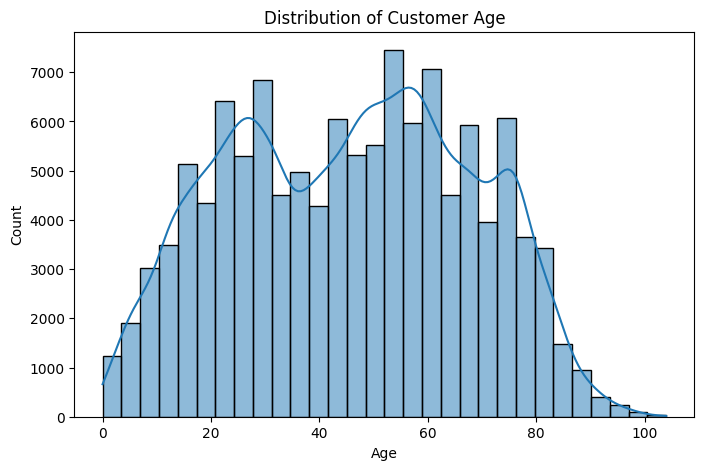

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["CustAgeInYears"], bins=30, kde=True)
plt.title("Distribution of Customer Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

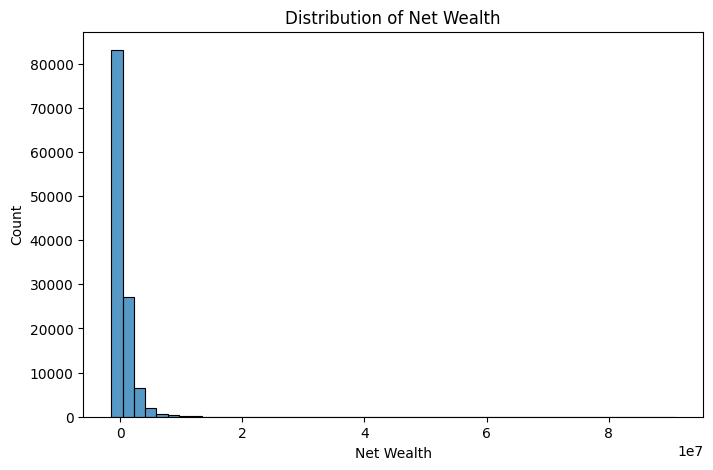

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Net_Wealth"], bins=50)
plt.title("Distribution of Net Wealth")
plt.xlabel("Net Wealth")
plt.ylabel("Count")
plt.show()

/Users/antonsort/Dropbox/CBS/Kandidat/Kandidatafhandling/Kode/Master-thesis/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


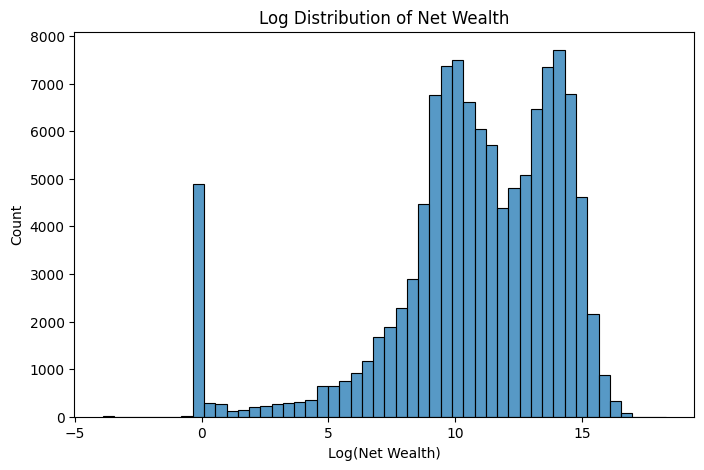

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["Net_Wealth"]), bins=50)
plt.title("Log Distribution of Net Wealth")
plt.xlabel("Log(Net Wealth)")
plt.ylabel("Count")
plt.show()

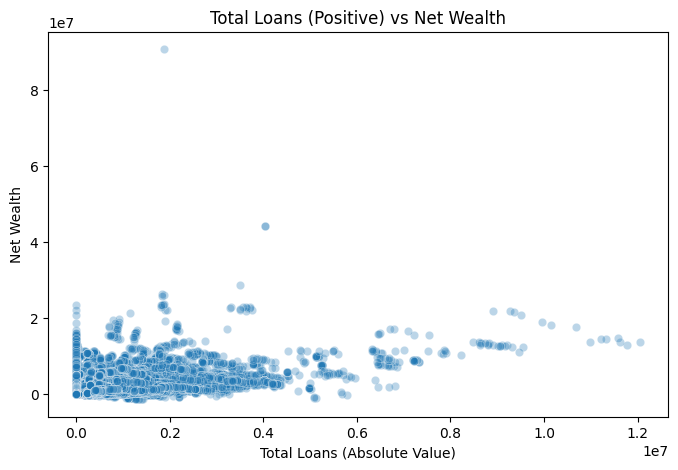

In [18]:
df["All_Loans_Positive"] = -df["All_Loans"]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="All_Loans_Positive",
    y="Net_Wealth",
    data=df,
    alpha=0.3
)

plt.title("Total Loans (Positive) vs Net Wealth")
plt.xlabel("Total Loans (Absolute Value)")
plt.ylabel("Net Wealth")
plt.show()

In [19]:
df.loc[df['Net_Wealth']>40000000]

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive
111488,2022-11-30,0170A1B6DEA951DE83B04EF55EAA67ED,"89.392.037,88","92.687.132,02","90.807.226,16","-1.879.905,86","3.295.094,14","3.610.366,05","83.901.765,97","5.175.000,00","-1.879.905,86","0,00","0,00","0,00","60,00",M,1989-06-21,2,2,DK,2100,10,3,0,0,0,0,1,0,"582.633,45","3.123.963,23","-4.437.436,14","0,00",554255,"545.448,95","545.448,95","0,00","1.879.905,86"
116220,2022-01-31,015D6E0D975B03EC92AAD9CEF9E75D5E,"4.027.408,29","48.300.000,00","44.272.591,71","-4.027.408,29","44.272.591,71","0,00","0,00","48.300.000,00","-4.027.408,29","0,00","0,00","0,00",NaN,NaN,2018-12-11,0,1,DK,2100,0,0,1,0,0,0,0,0,"0,00","0,00","-3.957.932,60","0,00",0,"0,00","0,00","0,00","4.027.408,29"
116221,2022-02-28,015D6E0D975B03EC92AAD9CEF9E75D5E,"4.023.621,56","48.375.000,00","44.351.378,44","-4.023.621,56","44.351.378,44","0,00","0,00","48.375.000,00","-4.023.621,56","0,00","0,00","0,00",NaN,NaN,2018-12-11,0,1,DK,2100,0,0,1,0,0,0,0,0,"0,00","0,00","-3.960.768,23","0,00",0,"0,00","0,00","0,00","4.023.621,56"


In [20]:
df.loc[df['Customer_number']=='0170A1B6DEA951DE83B04EF55EAA67ED']

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive
111478,2022-01-31,0170A1B6DEA951DE83B04EF55EAA67ED,"6.397.809,51","9.105.135,10","6.812.460,69","-2.292.674,41","2.707.325,59","145.113,54","3.960.021,56","5.000.000,00","-2.292.674,41","0,00","0,00","0,00","59,00",M,1989-06-21,2,2,DK,2100,2,5,0,0,0,0,1,0,"201.009,43","3.818.660,34","-4.545.761,63","0,00",4079057,"144.883,67","144.883,67","0,00","2.292.674,41"
111479,2022-02-28,0170A1B6DEA951DE83B04EF55EAA67ED,"6.207.498,46","9.011.864,03","6.816.229,60","-2.195.634,43","2.804.365,57","136.047,88","3.875.816,15","5.000.000,00","-2.195.634,43","0,00","0,00","0,00","59,00",M,1989-06-21,2,2,DK,2100,2,3,0,0,0,0,1,0,"138.893,27","4.094.719,28","-4.535.365,29","0,00",3927772,"128.421,26","128.421,26","0,00","2.195.634,43"
111480,2022-03-31,0170A1B6DEA951DE83B04EF55EAA67ED,"6.125.249,46","9.100.858,59","6.938.967,72","-2.161.890,87","2.975.609,13","15.623,74","3.947.734,85","5.137.500,00","-2.161.890,87","0,00","0,00","0,00","59,00",M,1989-06-21,2,2,DK,2100,2,13,0,0,0,0,1,0,"31.096,74","4.094.758,88","-4.521.445,59","-2.893,77",3859221,"14.937,50","14.937,50","0,00","2.161.890,87"
111481,2022-04-30,0170A1B6DEA951DE83B04EF55EAA67ED,"5.954.165,71","9.018.023,15","6.944.380,59","-2.073.642,56","3.063.857,44","28.758,01","3.851.765,14","5.137.500,00","-2.073.642,56","0,00","0,00","0,00","59,00",M,1989-06-21,2,2,DK,2100,7,5,0,0,0,0,1,0,"134.294,18","4.094.816,39","-4.513.535,93","-5.381,70",3901646,"28.534,85","28.534,85","0,00","2.073.642,56"
111482,2022-05-31,0170A1B6DEA951DE83B04EF55EAA67ED,"5.928.007,99","9.026.648,08","6.987.788,17","-2.038.859,91","3.098.640,09","127.699,60","3.761.448,48","5.137.500,00","-2.038.859,91","0,00","0,00","0,00","59,00",M,1989-06-21,2,2,DK,2100,20,2,0,0,0,0,1,0,"119.257,18","4.094.846,19","-4.502.597,18","0,00",3709783,"28.534,85","28.534,85","0,00","2.038.859,91"
111483,2022-06-30,0170A1B6DEA951DE83B04EF55EAA67ED,"5.679.747,29","8.820.319,96","6.835.892,63","-1.984.427,33","3.140.572,67","108.396,06","3.586.923,90","5.125.000,00","-1.984.427,33","0,00","0,00","0,00","59,00",M,1989-06-21,2,2,DK,2100,4,8,0,0,0,0,1,0,"86.397,72","0,00","-4.491.530,43","0,00",3644726,"35.121,61","35.121,61","0,00","1.984.427,33"
111484,2022-07-31,0170A1B6DEA951DE83B04EF55EAA67ED,"5.954.782,03","9.013.458,59","6.947.135,15","-2.066.323,44","3.058.676,56","117.105,61","3.771.352,98","5.125.000,00","-2.066.323,44","0,00","0,00","0,00","59,00",M,1989-06-21,2,2,DK,2100,1,14,0,0,0,0,1,0,"121.085,56","0,00","-4.480.915,77","0,00",3652138,"66.672,66","66.672,66","0,00","2.066.323,44"
111485,2022-08-31,0170A1B6DEA951DE83B04EF55EAA67ED,"6.466.483,05","9.671.098,16","7.750.713,27","-1.920.384,89","3.204.615,11","797.070,73","3.749.027,43","5.125.000,00","-1.920.384,89","0,00","0,00","0,00","60,00",M,1989-06-21,2,2,DK,2100,4,12,0,0,0,0,1,0,"199.182,60","0,00","-4.470.039,28","0,00",3839388,"115.142,39","115.142,39","0,00","1.920.384,89"
111486,2022-09-30,0170A1B6DEA951DE83B04EF55EAA67ED,"6.014.841,56","9.430.905,20","7.671.968,84","-1.758.936,36","3.416.063,64","747.360,88","3.508.544,32","5.175.000,00","-1.758.936,36","0,00","0,00","0,00","60,00",M,1989-06-21,2,2,DK,2100,8,5,0,0,0,0,1,0,"795.437,01","0,00","-4.457.104,45","0,00",3677863,"746.758,52","746.758,52","0,00","1.758.936,36"
111487,2022-10-31,0170A1B6DEA951DE83B04EF55EAA67ED,"8.364.542,71","11.699.338,33","9

In [21]:

#Check for more extreme spikes:
df = df.sort_values(["Customer_number", "FactDt"])

df["NetWealth_pct_change"] = df.groupby("Customer_number")["Net_Wealth"].pct_change()
df["NetWealth_pct_change_forward"] = (
    df.groupby("Customer_number")["Net_Wealth"]
      .pct_change(periods=-1)
)



df["NetWealth_abs_change"] = (
    df.groupby("Customer_number")["Net_Wealth"]
      .diff()
)

df["NetWealth_abs_change_forward"] = (
    df.groupby("Customer_number")["Net_Wealth"]
      .diff(periods=-1)
)

PCT_THRESHOLD = 5
ABS_THRESHOLD = df["NetWealth_abs_change"].quantile(0.995)

df["extreme_jump"] = (
    (df["NetWealth_pct_change"].abs() > PCT_THRESHOLD) &
    (df["NetWealth_pct_change_forward"].abs() > PCT_THRESHOLD) &
    (df["NetWealth_abs_change"].abs() > ABS_THRESHOLD) &
    (df["NetWealth_abs_change_forward"].abs() > ABS_THRESHOLD)

)

In [22]:
df.loc[df["extreme_jump"]==True]

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive,NetWealth_pct_change,NetWealth_pct_change_forward,NetWealth_abs_change,NetWealth_abs_change_forward,extreme_jump
35050,2022-04-30,0062396330935890BF5E4D34266B026F,"7.485.000,07","9.657.232,82","4.902.355,03","-4.754.877,79","2.172.232,75","3.294.732,82","0,00","6.362.500,00","-4.190.267,25","0,00","0,00","-564.610,54","38,00",F,2007-10-10,2,5,DK,2800,0,1,0,0,0,0,0,0,"0,00","0,00","-1.922.177,89","0,00",0,"-4.203.356,85","-4.202.822,85","-534,00","4.754.877,79","-6,04","5,14","5.875.944,33","4.103.701,03",True
50981,2022-03-31,009B6DBE1091C16D79AB4CE6F884772A,"1.033.727,63","1.033.727,63","1.033.727,63","0,00","0,00","1.033.727,63","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2860,54,1,1,0,1,0,0,0,"60.551,73","0,00","0,00","0,00",0,"23.610,28","23.610,28","0,00","-0,00","27,36","16,02","997.281,54","972.989,26",True
90542,2022-09-30,010FDAFE0A6F69AC9C41D627863F3548,"4.594.108,72","6.697.363,11","4.763.117,50","-1.934.245,61","2.103.254,39","2.659.863,11","57.900,00","4.037.500,00","-1.934.245,61","0,00","0,00","0,00","39,00",M,2005-08-25,2,4,DK,1799,0,15,1,1,0,0,0,0,"530.023,36","0,00","0,00","0,00",66122,"540.548,38","540.547,51","0,87","1.934.245,61","9,37","5,93","4.303.599,78","4.076.236,49",True
89649,2022-07-31,01165EB5CF3A5C4506182076A15D2B72,"4.061.343,95","4.061.343,95","4.061.343,95","0,00","0,00","4.061.343,95","0,00","0,00","0,00","0,00","0,00","0,00","45,00",F,2005-11-23,2,4,DK,3500,13,0,1,1,1,0,1,1,"980.093,92","0,00","-6.081.483,87","-0,22",0,"2.696.414,29","2.696.414,29","0,00","-0,00","-125,21","7,31","4.094.040,63","3.572.342,35",True
93559,2022-08-31,01243AE88BEDB9D00D4FCBB6340EB885,"2.263.124,23","2.263.124,23","2.263.124,23","0,00","0,00","2.144.109,12","172.680,64","0,00","0,00","0,00","0,00","0,00","69,00",M,1971-01-01,2,2,DK,2650,0,0,1,0,0,0,0,0,"1.354.472,77","132.282,67","0,00","0,00",54678,"65.746,38","65.746,38","0,00","-0,00","8,19","7,98","2.016.748,68","2.011.210,85",True
103936,2022-07-31,013FFB8AE8E8E6539415AF2EDE2FADA5,"710.663,19","710.663,19","710.663,19","0,00","0,00","710.663,19","0,00","0,00","0,00","0,00","0,00","0,00","50,00",M,1984-01-01,1,1,DK,3520,0,13,1,1,1,0,1,1,"856.751,25","0,00","0,00","-95,14",0,"45.885,24","45.885,24","0,00","-0,00","12,26","6,39","657.049,30","614.472,16",True
107602,2022-10-31,014561F16F0BC519B20AC8A09688BB9E,"6.442.710,62","11.700.012,49","6.004.863,45","-5.695.149,04","5.257.301,87","5.950.012,49","132.035,23","5.750.000,00","-492.698,13","0,00","0,00","-5.202.450,91","55,00",M,1983-03-15,2,3,DK,1468,43,3,1,1,0,0,0,0,"111.013,36","0,00","0,00","0,00",152611,"59.571,33","88.341,33","-32.810,00","5.695.149,04","12,55","32,98","5.561.815,13","5.828.130,11",True
110005,2022-03-31,0147E67652F0FA99E9FDB0F8BFCB91DA,"1.679.621,11","1.879.371,11","1.080.371,11","-799.000,00","199.750,00","880.621,11","0,00","998.750,00","-799.000,00","0,00","0,00","0,00","26,00",F,1995-07-14,2,3,DK,5000,86,3,1,0,0,0,1,1,"69.309,40","0,00","0,00","-354,84",0,"76.176,54","76.176,54","0,00","799.000,00","11,91","-23,50","996.687,94","1.128.392,82",True
112331,2022-08-31,0166AD0C49331E4575D91AABD87B5458,"0,00","0,00","-476.915,78","-476.915,78","0,00","0,00","0,00","0,00","0,00","0,00","0,00","-476.915,78","76,00",F,1979-01-01,2,2,DK,2740,23,12,1,1,0,0,0,0,"69.323,83","0,00","0,00","-15.569,47"

In [23]:
#Looks weird in february
df.loc[df['Customer_number']=='009B6DBE1091C16D79AB4CE6F884772A']

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive,NetWealth_pct_change,NetWealth_pct_change_forward,NetWealth_abs_change,NetWealth_abs_change_forward,extreme_jump
50979,2022-01-31,009B6DBE1091C16D79AB4CE6F884772A,"33.666,43","33.666,43","33.666,43","0,00","0,00","33.666,43","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2860,59,0,1,0,1,0,0,0,"32.319,02","0,00","0,00","0,00",0,"25.823,50","25.823,50","0,00","-0,00",NaN,"-0,08",NaN,"-2.779,66",False
50980,2022-02-28,009B6DBE1091C16D79AB4CE6F884772A,"36.446,09","36.446,09","36.446,09","0,00","0,00","36.446,09","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2860,47,0,1,0,1,0,0,0,"29.353,25","0,00","0,00","0,00",0,"25.075,69","25.075,69","0,00","-0,00","0,08","-0,96","2.779,66","-997.281,54",False
50981,2022-03-31,009B6DBE1091C16D79AB4CE6F884772A,"1.033.727,63","1.033.727,63","1.033.727,63","0,00","0,00","1.033.727,63","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2860,54,1,1,0,1,0,0,0,"60.551,73","0,00","0,00","0,00",0,"23.610,28","23.610,28","0,00","-0,00","27,36","16,02","997.281,54","972.989,26",True
50982,2022-04-30,009B6DBE1091C16D79AB4CE6F884772A,"60.738,37","60.738,37","60.738,37","0,00","0,00","60.738,37","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2860,59,25,1,0,1,0,0,0,"738.174,70","0,00","0,00","0,00",0,"51.011,59","51.011,59","0,00","-0,00","-0,94","0,57","-972.989,26","21.935,09",False
50983,2022-05-31,009B6DBE1091C16D79AB4CE6F884772A,"38.803,28","38.803,28","38.803,28","0,00","0,00","38.803,28","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2860,32,0,1,0,1,0,0,0,"55.895,13","0,00","0,00","0,00",0,"33.342,08","33.342,08","0,00","-0,00","-0,36","-0,07","-21.935,09","-3.005,10",False
50984,2022-06-30,009B6DBE1091C16D79AB4CE6F884772A,"41.808,38","41.808,38","41.808,38","0,00","0,00","41.808,38","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2860,47,3,1,0,1,0,0,0,"40.245,13","0,00","0,00","0,00",0,"34.487,82","34.487,82","0,00","-0,00","0,08","0,08","3.005,10","3.101,53",False
50985,2022-07-31,009B6DBE1091C16D79AB4CE6F884772A,"38.706,85","38.706,85","38.706,85","0,00","0,00","38.706,85","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2800,51,2,1,0,1,0,0,0,"35.523,94","0,00","0,00","0,00",0,"30.460,79","30.460,79","0,00","-0,00","-0,07","-0,33","-3.101,53","-19.086,02",False
50986,2022-08-31,009B6DBE1091C16D79AB4CE6F884772A,"57.792,87","57.792,87","57.792,87","0,00","0,00","57.792,87","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2800,60,0,1,0,1,0,0,0,"42.338,20","0,00","0,00","0,00",0,"33.991,28","33.991,28","0,00","-0,00","0,49","-0,05","19.086,02","-2.803,51",False
50987,2022-09-30,009B6DBE1091C16D79AB4CE6F884772A,"60.596,38","60.596,38","60.596,38","0,00","0,00","60.596,38","0,00","0,00","0,00","0,00","0,00","0,00","26,00",M,1999-08-17,1,1,DK,2800,31,2,1,0,1,0,0,0,"53.408,40","0,00","0,00","0,00",0,"49.655,78","49.655,78","0,00","-0,00","0,05","-0,04","2.803,51","-2.480,85",False
50988,2022-10-31,009B6DBE1091C16D79AB4CE6F884772A,"63.077,23","63.077,23","63.077,23","0,00","0,00","63.077,23","0,00","0,00","0,00","0,00","0,00","0,00","27,00",M,1999-08-17,1,1,DK,2800,43,1,1,0,1,0,0,0,"57.481,49","0,00","0,00","0,00",0,"52.387,02","52.387,02","0,00","-0,00","0,04","-0,02

In [24]:
#Looks weird in september (suddenly 0 business value, and a 1 month loan?)
df.loc[df['Customer_number']=='0166AD0C49331E4575D91AABD87B5458']

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive,NetWealth_pct_change,NetWealth_pct_change_forward,NetWealth_abs_change,NetWealth_abs_change_forward,extreme_jump
112324,2022-01-31,0166AD0C49331E4575D91AABD87B5458,"75.903,04","75.903,04","75.903,04","0,00","0,00","75.903,04","0,00","0,00","0,00","0,00","0,00","0,00","76,00",F,1979-01-01,2,2,DK,2740,8,9,1,1,0,0,0,0,"60.720,09","0,00","0,00","0,00",0,"57.157,15","57.157,15","0,00","-0,00",NaN,"-0,11",NaN,"-9.718,88",False
112325,2022-02-28,0166AD0C49331E4575D91AABD87B5458,"85.621,92","85.621,92","85.621,92","0,00","0,00","85.621,92","0,00","0,00","0,00","0,00","0,00","0,00","76,00",F,1979-01-01,2,2,DK,2740,7,10,1,1,0,0,0,0,"76.336,21","0,00","0,00","0,00",0,"72.088,71","72.088,71","0,00","-0,00","0,13","0,00","9.718,88","330,63",False
112326,2022-03-31,0166AD0C49331E4575D91AABD87B5458,"85.291,29","85.291,29","85.291,29","0,00","0,00","85.291,29","0,00","0,00","0,00","0,00","0,00","0,00","76,00",F,1979-01-01,2,2,DK,2740,12,10,1,1,0,0,0,0,"79.207,53","0,00","0,00","0,00",0,"73.417,80","73.417,80","0,00","-0,00","-0,00","-0,07","-330,63","-6.137,55",False
112327,2022-04-30,0166AD0C49331E4575D91AABD87B5458,"91.428,84","91.428,84","91.428,84","0,00","0,00","91.428,84","0,00","0,00","0,00","0,00","0,00","0,00","76,00",F,1979-01-01,2,2,DK,2740,18,7,1,1,0,0,0,0,"87.551,05","0,00","0,00","0,00",0,"83.448,84","83.448,84","0,00","-0,00","0,07","0,04","6.137,55","3.863,20",False
112328,2022-05-31,0166AD0C49331E4575D91AABD87B5458,"87.565,64","87.565,64","87.565,64","0,00","0,00","87.565,64","0,00","0,00","0,00","0,00","0,00","0,00","76,00",F,1979-01-01,2,2,DK,2740,19,4,1,1,0,0,0,0,"82.626,53","0,00","0,00","0,00",0,"79.194,83","79.194,83","0,00","-0,00","-0,04","0,05","-3.863,20","4.194,42",False
112329,2022-06-30,0166AD0C49331E4575D91AABD87B5458,"83.371,22","83.371,22","83.371,22","0,00","0,00","83.371,22","0,00","0,00","0,00","0,00","0,00","0,00","76,00",F,1979-01-01,2,2,DK,2740,19,9,1,1,0,0,0,0,"76.076,52","0,00","0,00","0,00",0,"71.982,53","71.982,53","0,00","-0,00","-0,05","0,02","-4.194,42","1.832,32",False
112330,2022-07-31,0166AD0C49331E4575D91AABD87B5458,"81.538,90","81.538,90","81.538,90","0,00","0,00","81.538,90","0,00","0,00","0,00","0,00","0,00","0,00","76,00",F,1979-01-01,2,2,DK,2740,12,0,1,1,0,0,0,0,"75.921,48","0,00","0,00","0,00",0,"72.145,76","72.145,76","0,00","-0,00","-0,02","-1,17","-1.832,32","558.454,68",False
112331,2022-08-31,0166AD0C49331E4575D91AABD87B5458,"0,00","0,00","-476.915,78","-476.915,78","0,00","0,00","0,00","0,00","0,00","0,00","0,00","-476.915,78","76,00",F,1979-01-01,2,2,DK,2740,23,12,1,1,0,0,0,0,"69.323,83","0,00","0,00","-15.569,47",0,"-476.915,78","-476.915,78","0,00","476.915,78","-6,85","-7,83","-558.454,68","-546.741,75",True
112332,2022-09-30,0166AD0C49331E4575D91AABD87B5458,"69.825,97","69.825,97","69.825,97","0,00","0,00","69.825,97","0,00","0,00","0,00","0,00","0,00","0,00","77,00",F,1979-01-01,2,2,DK,2740,21,0,1,1,0,0,0,0,"66.451,36","0,00","0,00","0,00",0,"64.005,59","64.005,59","0,00","-0,00","-1,15","-0,06","546.741,75","-4.079,14",False
112333,2022-10-31,0166AD0C49331E4575D91AABD87B5458,"73.905,11","73.905,11","73.905,11","0,00","0,00","73.905,11","0,00","0,00","0,00","0,00","0,00","0,00","77,00",F,1979-01-01,2,2,DK,2740,17,3,1,1,0,0,0,0,"67.734,84","0,00","0,00","0,00",0,"66.972,32","66.972,32","0,00","-0,00","0,06","

In [25]:
#check if over 18 there is atleast 1 adult in family
age_adult_inconsistency = df[
    (df["CustAgeInYears"] >= 18) &
    (df["fam_members_adult"] < 1)
]

print("Number of adult household inconsistencies:", len(age_adult_inconsistency))
age_adult_inconsistency.head()

Number of adult household inconsistencies: 0


,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive,NetWealth_pct_change,NetWealth_pct_change_forward,NetWealth_abs_change,NetWealth_abs_change_forward,extreme_jump


In [26]:
#sanity check that age always rises
df = df.sort_values(["Customer_number", "FactDt"])

df["age_diff"] = df.groupby("Customer_number")["CustAgeInYears"].diff()

age_decrease = df[df["age_diff"] < 0]

print("Customers where age decreases:", len(age_decrease))
age_decrease.head()

Customers where age decreases: 0


,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive,NetWealth_pct_change,NetWealth_pct_change_forward,NetWealth_abs_change,NetWealth_abs_change_forward,extreme_jump,age_diff


In [27]:
#Countries in data:
df["Country"].value_counts(dropna=False)
#All Denmark so this variable can be dropped

invalid_postal = df[
    ~df["CustPostalCd"].str.match(r"^\d{4}$", na=False)
]

print("Number of invalid postal codes:", len(invalid_postal))
invalid_postal[["Customer_number", "CustPostalCd"]].head()


Number of invalid postal codes: 5816


,Customer_number,CustPostalCd
1176,000022D8D733FA51200BF5F45C37AED2,NaN
1177,000022D8D733FA51200BF5F45C37AED2,NaN
1178,000022D8D733FA51200BF5F45C37AED2,NaN
1179,000022D8D733FA51200BF5F45C37AED2,NaN
1180,000022D8D733FA51200BF5F45C37AED2,NaN


In [28]:

missing_summary = df.isna().sum().sort_values(ascending=False)
missing_summary[missing_summary > 0]
# So lets look at CustPostalCd, CustAgeInYears, CustGenderCd  

NetWealth_pct_change_forward    14586
NetWealth_pct_change            14586
age_diff                        10851
NetWealth_abs_change_forward    10451
NetWealth_abs_change            10451
CustPostalCd                     1807
CustAgeInYears                    438
CustGenderCd                       38
dtype: int64

In [29]:
df = df.sort_values(["Customer_number", "FactDt"])

# Identify customers with partially missing age (some NaNs but not all)
age_missing_summary = df.groupby("Customer_number")["CustAgeInYears"].agg(
    missing=lambda s: s.isna().sum(),
    total="size"
)

partial_customers = age_missing_summary[
    (age_missing_summary["missing"] > 0) &
    (age_missing_summary["missing"] < age_missing_summary["total"])
].index

# Fill ONLY for partially-missing customers:
mask_partial = df["Customer_number"].isin(partial_customers)

df.loc[mask_partial, "CustAgeInYears"] = (
    df.loc[mask_partial]
      .groupby("Customer_number")["CustAgeInYears"]
      .transform(lambda s: s.ffill().bfill())
)

# Quick sanity check
remaining_partial_missing = df.loc[mask_partial, "CustAgeInYears"].isna().sum()
print("Remaining missing ages among partially-missing customers:", remaining_partial_missing)

Remaining missing ages among partially-missing customers: 0


In [30]:
##Filling out the rest of the nulls:


df["FactDt"] = pd.to_datetime(df["FactDt"], errors="coerce")
df["CustEstbDt"] = pd.to_datetime(df["CustEstbDt"], errors="coerce")

# Keep rows where age exists
df_valid_age = df.dropna(subset=["CustAgeInYears", "FactDt", "CustEstbDt"]) \
                 .sort_values(["Customer_number", "FactDt"])

# Take only first observation per customer
one_row_per_customer = df_valid_age.groupby("Customer_number").head(1).copy()

In [31]:
one_row_per_customer["years_since_join"] = (
    (one_row_per_customer["FactDt"] - one_row_per_customer["CustEstbDt"]).dt.days / 365.25
)

one_row_per_customer["age_at_join"] = (
    one_row_per_customer["CustAgeInYears"] -
    one_row_per_customer["years_since_join"]
)

avg_age_at_join = one_row_per_customer["age_at_join"].mean()

print("Average customer age at onboarding:", round(avg_age_at_join, 2))


Average customer age at onboarding: 20.59


In [32]:
# Ensure datetime
df["FactDt"] = pd.to_datetime(df["FactDt"], errors="coerce")
df["CustEstbDt"] = pd.to_datetime(df["CustEstbDt"], errors="coerce")

# Identify rows with missing age
mask_missing_age = (
    df["CustAgeInYears"].isna() &
    df["FactDt"].notna() &
    df["CustEstbDt"].notna()
)

# Calculate years since joining
years_since_join = (
    (df.loc[mask_missing_age, "FactDt"] -
     df.loc[mask_missing_age, "CustEstbDt"]).dt.days / 365.25
)

# Impute and round to nearest whole number
df.loc[mask_missing_age, "CustAgeInYears"] = (
    avg_age_at_join + years_since_join
).round()

In [33]:
print("Remaining missing ages:", df["CustAgeInYears"].isna().sum())

Remaining missing ages: 0


In [ ]:
#looking at postal codes they make no sense alot of them. I would for this argue to drop, furthermore it is hard to actual group by postal code. It would be fun to use some geographic data in denmark to try to approximate the if people live same area they act similar. I have to indskærpe somehow.

In [34]:

#lets look at the missing gender:
df.loc[df['CustGenderCd'].isna(), ['Customer_number', 'CustGenderCd']].drop_duplicates()
#only 4 customers missing genders. From my past experience, we try no to bias so I actually would argue not to look at sex at all. Perhaps it is interesting in some later segmentation, but I would normally rephrane from actually using explicit in a model.

,Customer_number,CustGenderCd
53037,008F6F324790BBF352B36C71D57154CB,NaN
60074,00B38C540F11174209C2F83E025A8185,NaN
102852,0143DF58DAEB1132C3D8AAD3DCD47821,NaN
116220,015D6E0D975B03EC92AAD9CEF9E75D5E,NaN


In [35]:
df.loc[df['Customer_number']=='015D6E0D975B03EC92AAD9CEF9E75D5E']

,FactDt,Customer_number,Business_Volume,Gross_wealth,Net_Wealth,All_Loans,House_free_Equity,Financial_Assets,Investment_Assets,RealEstateValue,HomeLoan,CAR_LOANS,BOAT_LOANS,Other_loans,CustAgeInYears,CustGenderCd,CustEstbDt,fam_members_adult,fam_members,Country,CustPostalCd,CustMobileLogOnPerMth,CustNetBankLogOnPerMth,IsGeneralMarketingAllowed,IsMarketingForEmailAllowed,IsMarketingForSmsAllowed,IsMarketingForLetterAllowed,IsMarketingForPhoneAllowed,IsMarketingForEbankAllowed,AvgDepositsValueDKK,AvgPensionValueDKK,AvgHomeFinanceValueDKK,AvgOtherLoansValueDKK,AvgInvestmentsValueDKK,Deposits_Cards_lowest,Deposits_ordinary_lowest,Creditcard_overdraft_lowest,All_Loans_Positive,NetWealth_pct_change,NetWealth_pct_change_forward,NetWealth_abs_change,NetWealth_abs_change_forward,extreme_jump,age_diff
116220,2022-01-31,015D6E0D975B03EC92AAD9CEF9E75D5E,"4.027.408,29","48.300.000,00","44.272.591,71","-4.027.408,29","44.272.591,71","0,00","0,00","48.300.000,00","-4.027.408,29","0,00","0,00","0,00","24,00",NaN,2018-12-11,0,1,DK,2100,0,0,1,0,0,0,0,0,"0,00","0,00","-3.957.932,60","0,00",0,"0,00","0,00","0,00","4.027.408,29",NaN,"-0,00",NaN,"-78.786,73",False,NaN
116221,2022-02-28,015D6E0D975B03EC92AAD9CEF9E75D5E,"4.023.621,56","48.375.000,00","44.351.378,44","-4.023.621,56","44.351.378,44","0,00","0,00","48.375.000,00","-4.023.621,56","0,00","0,00","0,00","24,00",NaN,2018-12-11,0,1,DK,2100,0,0,1,0,0,0,0,0,"0,00","0,00","-3.960.768,23","0,00",0,"0,00","0,00","0,00","4.023.621,56","0,00",NaN,"78.786,73",NaN,False,NaN


In [37]:
columns_to_exclude = ["Country", "CustPostalCd", "CustomerActive"]
df_revised = df.drop(columns=columns_to_exclude, errors="ignore")

# Save to CSV
df_revised.to_csv("data_revised.csv", index=False)